# Clustering - Cereals Dataset

### Import Libraries

In [1]:
# Loadind the required modules to read the data 
import pandas as pd
import numpy as np

import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)  # TO set print options to suppress scientific notations

### Reading data

In [2]:
cereals = pd.read_csv("Cereals.csv")
cereals.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


### Aggregating "name", "shelf" and "rating" to make labels

In [3]:
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

# Data Exploration

In [4]:
# check the head
cereals.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33,100%_Bran (3 - 68.4)
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00,100%_Natural_Bran (3 - 33.98)
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33,All-Bran (3 - 59.43)
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.0,0.50,All-Bran_with_Extra_Fiber (3 - 93.7)
4,110,2,2,200,1.0,14.0,8.0,NaN,25,1.0,0.75,Almond_Delight (3 - 34.38)


### Check summary statistics

In [5]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,1.029610,0.821039
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.150477,0.232716
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,1.500000,1.500000


### Decouple label from the features

In [6]:
cereals.columns

Index(['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'weight', 'cups', 'label'],
      dtype='object')

In [7]:
## Select all columns except "label"
cereals_label = cereals['label']
cereals = cereals[cereals.columns.difference(['label'])]

In [8]:
## Check the data
cereals.columns

Index(['calories', 'carbo', 'cups', 'fat', 'fiber', 'potass', 'protein',
       'sodium', 'sugars', 'vitamins', 'weight'],
      dtype='object')

### Check missing values

In [9]:
cereals.isnull().sum()
cereals.shape

(77, 11)

### Imputation

In [10]:
from sklearn.impute import SimpleImputer
mean_Imputer = SimpleImputer()

imputed_cereals = pd.DataFrame(mean_Imputer.fit_transform(cereals),
                               columns=cereals.columns)

### Checking for NAs again

In [11]:
imputed_cereals.isnull().sum(axis=0)

calories    0
carbo       0
cups        0
fat         0
fiber       0
potass      0
protein     0
sodium      0
sugars      0
vitamins    0
weight      0
dtype: int64

### Standardization

In [12]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(imputed_cereals)
std_x = standardizer.transform(imputed_cereals)
std_cereals = pd.DataFrame(std_x,columns=imputed_cereals.columns)
std_cereals.head()

,calories,carbo,cups,fat,fiber,potass,protein,sodium,sugars,vitamins,weight
0,-1.905397,-2.542013,-2.123870,-0.012988,3.314439,2.627053,1.337319,-0.356306,-0.237495,-0.14627,-0.198067
1,0.677623,-1.764055,0.774053,3.987349,-0.064172,0.526376,0.417912,-1.737087,0.225316,-1.27255,-0.198067
2,-1.905397,-2.023374,-2.123870,-0.012988,2.892113,3.206550,1.337319,1.204578,-0.468901,-0.14627,-0.198067
3,-2.938605,-1.764055,-1.388576,-1.013072,5.003745,3.351425,1.337319,-0.236238,-1.625929,-0.14627,-0.198067
4,0.161019,-0.208138,-0.307262,0.987096,-0.486498,0.000000,-0.501495,0.484170,0.225316,-0.14627,-0.198067


In [13]:

std_cereals.describe()


,calories,carbo,cups,fat,fiber,potass,protein,sodium,sugars,vitamins,weight
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-1.258012e-16,-4.527403e-16,1.665335e-16,1.013349e-16,1.463476e-16,-4.758099e-17,5.767392e-17,-5.190653e-17,-2.144749e-16,5.190653e-17,-1.982541e-16
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-2.938605e+00,-2.542013e+00,-2.469891e+00,-1.013072e+00,-9.088244e-01,-1.212115e+00,-1.420902e+00,-1.917189e+00,-1.625929e+00,-1.272550e+00,-3.542628e+00
25%,-3.555846e-01,-7.267769e-01,-6.532825e-01,-1.013072e+00,-4.864980e-01,-7.774919e-01,-5.014948e-01,-3.563056e-01,-9.317120e-01,-1.462701e-01,-1.980675e-01
50%,1.610194e-01,-4.606439e-16,-3.072619e-01,-1.298811e-02,-6.417167e-02,-1.255577e-01,4.179123e-01,2.440343e-01,-6.089621e-03,-1.462701e-01,-1.980675e-01
75%,1.610194e-01,5.698204e-01,7.740527e-01,9.870962e-01,3.581547e-01,3.090651e-01,4.179123e-01,6.042382e-01,9.195328e-01,-1.462701e-01,-1.980675e-01
max,2.744040e+00,2.125737e+00,2.936682e+00,3.987349e+00,5.003745e+00,3.351425e+00,3.176134e+00,1.924986e+00,1.845155e+00,3.232570e+00,3.146493e+00


#### Note - Clustering is an unsupervised method and hence we are not concerned about train-test split or prediction accuracies.

## Agglomerative Clustering
**Parameter description**

n_clusters : The number of clusters to find.


linkage : {“ward”, “complete”, “average”}

- ward minimizes the variance of the clusters being merged.
- complete uses the maximum distances between all observations of the two sets.
- average uses the average of the distances of each observation of the two sets.

affinity : {“euclidean”, “l1”, “l2”, “manhattan”, “cosine”}

- Metric used to compute the linkage.

<IPython.core.display.Javascript object>


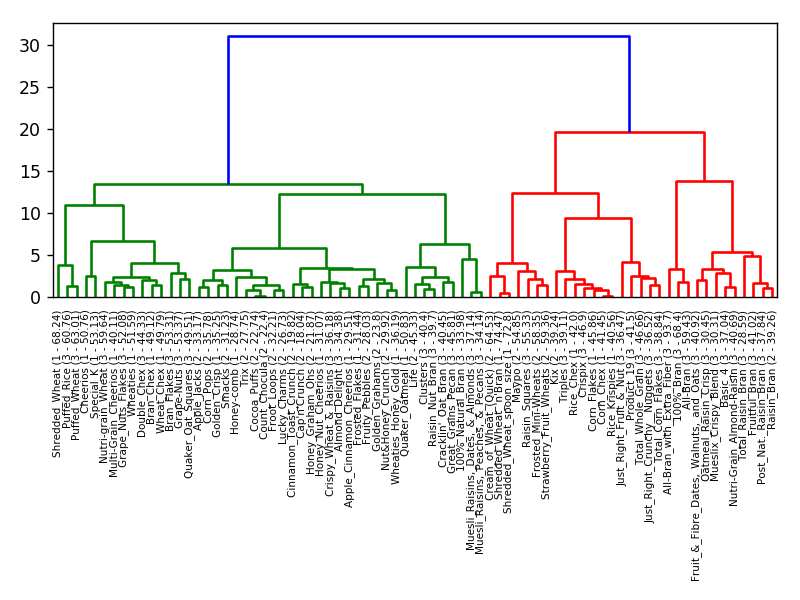

In [28]:
# loading the models 
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
%matplotlib notebook
# Preparing linkage matrix
linkage_matrix = linkage(std_cereals, method='ward',metric='euclidean')
##plotting
dendrogram(linkage_matrix,labels=cereals_label.as_matrix())
plt.tight_layout()
plt.show()

In [15]:

linkage_matrix

array([[ 14.        ,  18.        ,   0.14487426,   2.        ],
       [ 15.        ,  62.        ,   0.18816182,   2.        ],
       [ 64.        ,  65.        ,   0.57407348,   2.        ],
       [ 44.        ,  45.        ,   0.6603739 ,   2.        ],
       [ 16.        ,  78.        ,   0.87550797,   3.        ],
       [ 48.        ,  76.        ,   0.88551413,   2.        ],
       [ 73.        ,  77.        ,   0.9007893 ,   3.        ],
       [ 24.        ,  42.        ,   0.93082052,   2.        ],
       [ 13.        ,  59.        ,   1.02098928,   2.        ],
       [ 21.        ,  81.        ,   1.08586587,   4.        ],
       [ 52.        ,  58.        ,   1.10266673,   2.        ],
       [  4.        ,   5.        ,   1.14573093,   2.        ],
       [ 32.        ,  75.        ,   1.18437314,   2.        ],
       [ 10.        ,  35.        ,   1.19253426,   2.        ],
       [  7.        ,  49.        ,   1.19459229,   2.        ],
       [  6.        ,  17

In [16]:
from sklearn.cluster import AgglomerativeClustering
## Instantiating object
agg_clust = AgglomerativeClustering(n_clusters=6,
                                    affinity="euclidean",
                                    linkage = "ward")
## Training model and return class labels
agg_clusters = agg_clust.fit_predict(std_cereals)
## Label - Cluster
agg_result = pd.DataFrame({"labels":cereals_label,
                           "agg_cluster":agg_clusters
                          }).sort_values("agg_cluster")
agg_result.agg_cluster.value_counts()
#agg_result.head()

2    25
4    22
0    13
1    12
3     3
5     2
Name: agg_cluster, dtype: int64

In [17]:
agg_result

,labels,agg_cluster
49,Nutri-Grain_Almond-Raisin (3 - 40.69),0
1,100%_Natural_Bran (3 - 33.98),0
46,Mueslix_Crispy_Blend (3 - 30.31),0
45,"Muesli_Raisins,_Peaches,_&_Pecans (3 - 34.14)",0
44,"Muesli_Raisins,_Dates,_&_Almonds (3 - 37.14)",0
70,Total_Raisin_Bran (3 - 28.59),0
51,Oatmeal_Raisin_Crisp (3 - 30.45),0
7,Basic_4 (3 - 37.04),0
39,Just_Right_Fruit_&_Nut (3 - 36.47),0
52,Post_Nat._Raisin_Bran (3 - 37.84),0


## K-Means Clustering
**Parameter description**

n_clusters : The number of clusters to find.

tol : Relative tolerance with regards to inertia to declare convergence

n_init : Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

max_iter : max iterations of recomputing new cluster centroids 

n_jobs : The number of jobs to use for the computation. This works by computing each of the n_init runs in parallel.


In [30]:
from sklearn.cluster import KMeans
kmeans_object = KMeans(n_clusters=6,random_state=123)
kmeans_object.fit(std_cereals)
kmeans_clusters = kmeans_object.predict(std_cereals)
kmeans_result = pd.DataFrame({"labels":cereals_label,
                              "kmeans_cluster":kmeans_clusters})
kmeans_result.head()

,labels,kmeans_cluster
0,100%_Bran (3 - 68.4),0
1,100%_Natural_Bran (3 - 33.98),3
2,All-Bran (3 - 59.43),0
3,All-Bran_with_Extra_Fiber (3 - 93.7),0
4,Almond_Delight (3 - 34.38),3


### Inspecting cluster centroids to understand average statistics of each cluster

In [31]:
kmeans_object.cluster_centers_

array([[-2.24979938, -2.10981415, -1.87877244, -0.34634956,  3.73676565,
         3.06167606,  1.33731939,  0.20401161, -0.77744163, -0.14627013,
        -0.19806746,  5.        ],
       [-0.74303762,  0.14522744,  0.04686867, -0.38801974,  0.1126775 ,
        -0.05764788,  0.53283819, -0.12742604, -0.83009148, -0.42784013,
        -0.6872094 ,  2.0625    ],
       [ 0.16101944,  1.45582863,  0.82090972, -0.51303028, -0.59207963,
        -0.70505474, -0.34826026,  0.97444783, -0.79672543,  1.26157987,
        -0.03083945,  6.41666667],
       [ 0.33322078, -0.61008319, -0.00016852,  0.52039021, -0.42314908,
        -0.38214611, -0.47084787, -0.05813681,  0.7729759 , -0.1838128 ,
        -0.19806746,  0.73333333],
       [-0.6507869 ,  0.60686606, -0.06628318, -0.87020326,  0.05649301,
         0.13038684,  0.28656844, -1.75423999, -0.93171203, -0.62896156,
        -0.19806746,  8.        ],
       [ 1.25162795,  0.06558811, -0.49949558,  0.43149382,  0.71009334,
         1.1944078 ,  

In [20]:
cluster_centroids = pd.DataFrame(standardizer.inverse_transform(kmeans_object.cluster_centers_),
                                 columns = cereals.columns)
cluster_centroids

,calories,carbo,cups,fat,fiber,potass,protein,sodium,sugars,vitamins,weight
0,110.833333,12.416667,0.880417,1.208333,0.708333,54.944444,1.625000,165.625000,10.958333,23.958333,1.000000
1,94.090909,14.695574,0.702273,0.863636,2.554545,106.303030,2.909091,82.954545,4.001196,17.045455,0.946818
2,135.000000,15.625000,0.758333,1.666667,3.541667,172.083333,3.166667,180.416667,10.916667,37.500000,1.287500
3,63.333333,6.666667,0.386667,0.666667,11.000000,310.000000,4.000000,176.666667,3.666667,25.000000,1.000000
4,105.625000,19.437500,1.023750,0.500000,1.062500,59.062500,2.687500,237.500000,3.000000,43.750000,1.000000


### Selecting the best k value - using Elbow plot 

**Error Sum of Squares (SSE) SSE** is the sum of the squared differences between each observation and its group's mean. It can be used as a measure of variation within a cluster.

In [21]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=1234).fit(std_cereals)
    std_cereals["clusters"] = kmeans.labels_
    #print(std_cereals["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center


In [22]:
trace0=go.Scatter(type="scatter",
                   x=list(sse.keys()),
                  y=list(sse.values()))

data=[trace0]

layout = go.Layout(title = 'Number of Clusters Vs SSE ',xaxis=dict(title= 'Number of Clusters'),
                   yaxis=dict(title= 'SSE'))

    
fig = go.Figure(data=data, layout=layout)    
iplot(fig)

### How to select best K value for K-Means -> Silhouette Analysis
**Higher the silhouette score better the clustering**

*The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.*



Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

Automatically created module for IPython interactive environment


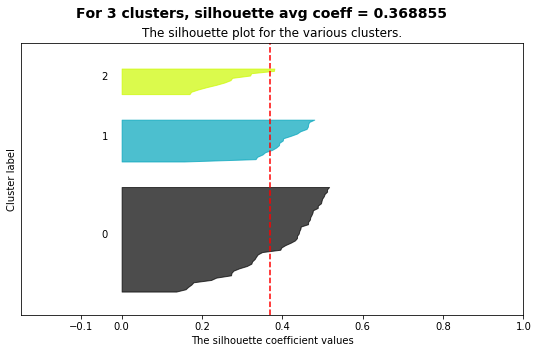

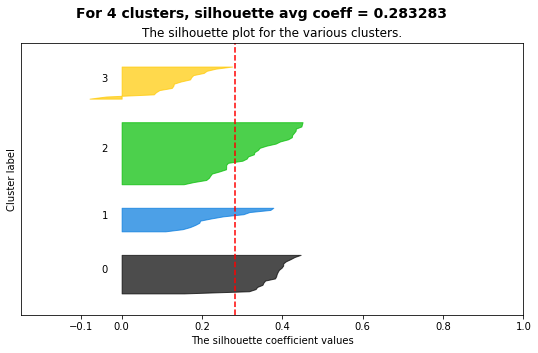

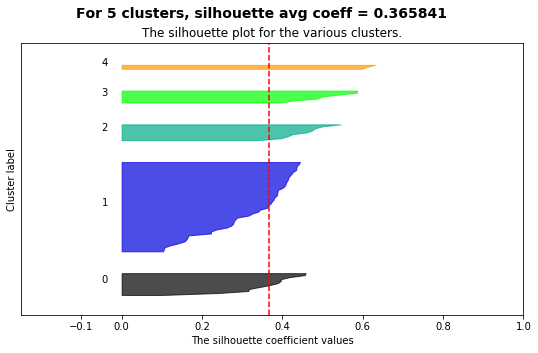

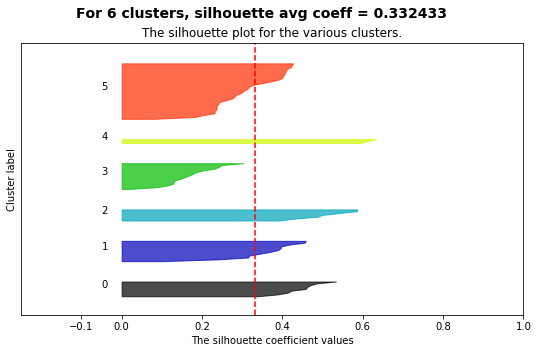

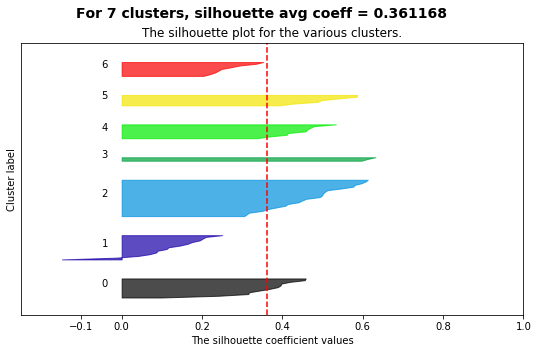

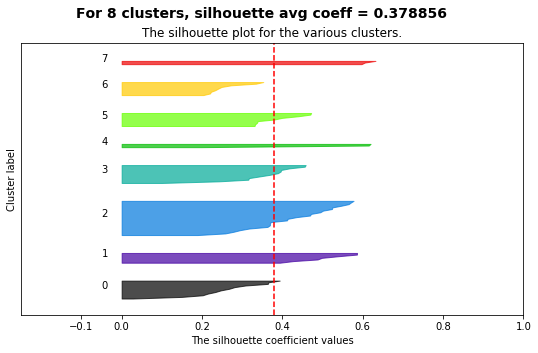

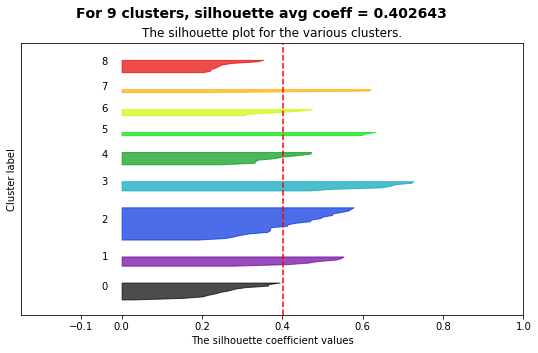

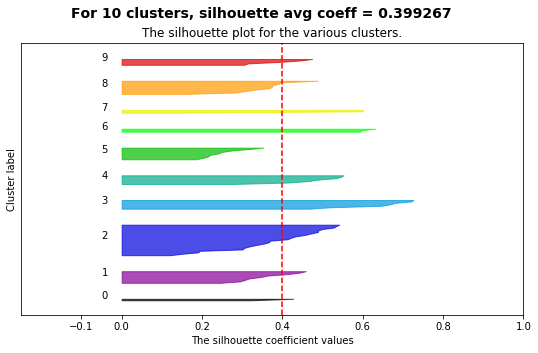

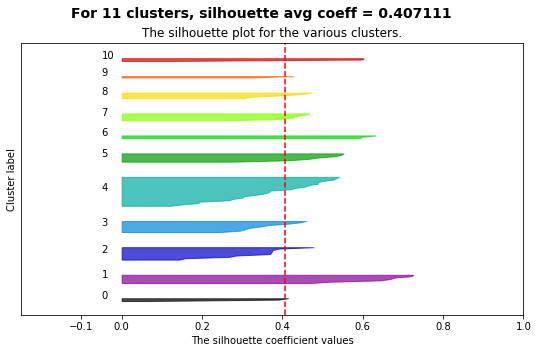

In [23]:
## Standard plotting code copied from sklearn documentation.
## Just change "X_matrix" to the data of your choice

from __future__ import print_function


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__) 
##The print(__doc__) command simply re-uses that documentation string to write it 
#to your terminal each time you run the script

### Just change this to your dataframe
X_matrix = std_cereals.as_matrix()

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.25, .5])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_matrix) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

### Note - Higher the silhouette score better the clustering.
Hence best K value for this dataset is 7-8

In [32]:
best_kmeans = KMeans(n_clusters=8, random_state=1234)
best_kmeans.fit(std_cereals)
best_kmeans_labels = best_kmeans.predict(std_cereals)

## Using PCA to visualize data

In [33]:
from sklearn.decomposition import PCA
pca_obj = PCA(n_components=3).fit(std_cereals)
pca_train = pca_obj.transform(std_cereals)
print(pca_obj.explained_variance_ratio_)
print("Cumulative variance explained", np.sum(pca_obj.explained_variance_ratio_))

[0.43861176 0.17237843 0.1460522 ]
Cumulative variance explained 0.7570423897585495


## Interactive 3-D plot

In [34]:
trace1 = go.Scatter3d(
    x=pca_train[:,0],
    y=pca_train[:,1],
    z=pca_train[:,2],
    mode='markers',
    marker=dict(
        color=best_kmeans.labels_, 
        opacity=0.8
    )
)


data = [trace1]
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='PCA 0',
                        #backgroundcolor="black",
                        showbackground=True,
                        titlefont=dict(
                                        size=16,
                                        color='black'
                                        )
                    ),
                    yaxis = dict(
                        title='PCA 1',
                        showbackground=True,
                        #backgroundcolor="black",
                        titlefont=dict(
                                        size=16,
                                        color='black'
                                        )
                    ),
                    zaxis = dict(
                        title='PCA 2',
                        #backgroundcolor="black",
                        showbackground=True,
                        titlefont=dict(
                                        size=16,
                                        color='black'
                                        )
                    )
                    ),
                        width=1000, # height of the figure in pixels
                        height=800, # height of the figure in pixels
                  )
fig = go.Figure(data=data, layout=layout)
fig['layout'].update(title= "Clustering")
iplot(fig)


In [27]:
cereals['best_kmeans_cluster'] = best_kmeans_labels
cereals.to_csv('cereal with cluster_label.csv')